In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('language_data_with_dates.csv')
#codes where df[df['ascl-id'] == 0] need to be dealt with when thinking about dates

(-1.1122943007093113,
 1.101258600491493,
 -1.1010813502712005,
 1.1000514928760843)

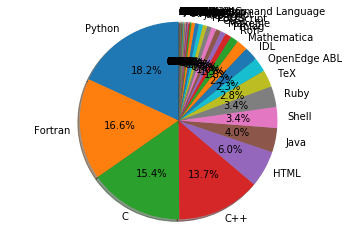

In [16]:
#A pie chart of the total language stats

#cast the Bytes column to int64
df = df[pd.to_numeric(df.Bytes,errors='coerce').notnull()]
df.Bytes = df['Bytes'].astype(str).astype(int)
df.sort_values(by='Bytes', ascending=False)

#group the rows by languages and sum on the Bytes column
lang = df.groupby('Language', as_index=False)['Bytes'].sum()

#Sed takes up a lot because one repository was
#using the file extension for their own data, not code
#Jupyter notebooks can be excluded, since they may contain 
#images which can artificially inflate the size
lang = lang[lang['Language'] != "sed"]
lang = lang[lang['Language'] != "Jupyter Notebook"]

#create a new column for the percent that language occupies
lang['% of total'] = lang.Bytes / lang.Bytes.sum() * 100

#filtering out irrelevant data
lang = lang[lang['% of total'] > 0.001]

lang = lang.sort_values(by='% of total', ascending=False)

#Pie chart time!
fig1, ax1 = plt.subplots()
ax1.pie(lang[lang.columns[1]], labels=lang[lang.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

                                   Language      Bytes  % of total
0                                    Python  289004288   18.163067
1                                   Fortran  263411241   16.554619
2                                         C  244733012   15.380748
3                                       C++  218327962   13.721268
4   All other languages, each < 2% of total  191282135   12.021518
5                                      HTML   95307284    5.989782
6                                      Java   63113450    3.966494
7                                     Shell   54842464    3.446687
8                                      Ruby   53948642    3.390513
9                                       TeX   44539192    2.799157
10                             OpenEdge ABL   36927794    2.320803
11                                      IDL   35571569    2.235568


(-1.1125275989249963,
 1.1061580341722685,
 -1.101081319684025,
 1.1000514928489695)

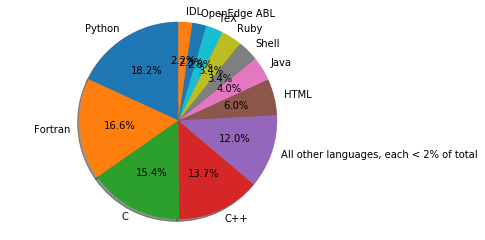

In [21]:
#Now, create a pie chart with languages <2% consolidated into one "Other Languages" entry

#calculate percent sum
#calculate bytes sum
#filter lang dataframe for > 2%
#create new dataframe row of sum data and append to filtered dataframe

find_sum = lang[lang['% of total'] < 2].sum()

pct_sum = find_sum['% of total']
bytes_sum = find_sum['Bytes']

new_row = ["All other languages, each < 2% of total",
          bytes_sum,
          pct_sum]

most = lang[lang['% of total'] >= 2].reset_index().drop(columns=['index'])
most.loc[len(most)] = new_row
most = most.sort_values(by='% of total', ascending=False).reset_index().drop(columns=['index'])
print(most)


fig2, ax2 = plt.subplots()
ax2.pie(most[most.columns[1]], labels=most[most.columns[0]], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')